# Dar es Salaam, Tanzania With OSMnx and prettymaps

In [101]:
# install packages from github & osmnx version 1.2.1 
# run only once 
!pip install git+https://github.com/abey79/vsketch#egg=vsketch
!pip install git+https://github.com/marceloprates/prettymaps.git
!pip install osmnx==1.2.1

  Cloning https://github.com/abey79/vsketch to c:\users\samia\appdata\local\temp\pip-install-ya84dpoj\vsketch_1512cc827c3a4fdd90f5aa1ded711432
  Resolved https://github.com/abey79/vsketch to commit 36a7ecfd8520e2dce57a8089131ece6d1f6354d4
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached vpype-1.12.0a0-py3-none-any.whl


  Running command git clone --filter=blob:none --quiet https://github.com/abey79/vsketch 'C:\Users\samia\AppData\Local\Temp\pip-install-ya84dpoj\vsketch_1512cc827c3a4fdd90f5aa1ded711432'
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x26804e4d820>
C:\Users\samia\anaconda3\lib\threading.py:921: ResourceWarning: unclosed file <_io.BufferedWriter name=6>
  del self._target, self._args, self._kwargs
C:\Users\samia\anaconda3\lib\threading.py:921: ResourceWarning: unclosed file <_io.BufferedReader name=7>
  del self._target, self._args, self._kwargs
C:\Users\samia\anaconda3\lib\threading.py:921: ResourceWarning: unclosed file <_io.BufferedReader name=8>
  del self._target, self._args, self._kwargs
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x26804e55580>


^C


sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x26804e76dc0>


In [103]:
# a check to see all packages have been successfully installed 
!pip freeze


alabaster @ file:///home/ktietz/src/ci/alabaster_1611921544520/work
anaconda-client==1.11.0
anaconda-navigator==2.3.2
anaconda-project @ file:///C:/Windows/TEMP/abs_91fu4tfkih/croots/recipe/anaconda-project_1660339890874/work
anyio @ file:///C:/ci/anyio_1644481921011/work/dist
appdirs==1.4.4
argon2-cffi @ file:///opt/conda/conda-bld/argon2-cffi_1645000214183/work
argon2-cffi-bindings @ file:///C:/ci/argon2-cffi-bindings_1644551690056/work
arrow @ file:///opt/conda/conda-bld/arrow_1649166651673/work
asteval==0.9.27
astroid @ file:///C:/Windows/TEMP/abs_b0dtxgpicv/croots/recipe/astroid_1659023126745/work
astropy @ file:///C:/ci/astropy_1657719656942/work
atomicwrites==1.4.0
attrs @ file:///opt/conda/conda-bld/attrs_1642510447205/work
Automat @ file:///tmp/build/80754af9/automat_1600298431173/work
autopep8 @ file:///opt/conda/conda-bld/autopep8_1650463822033/work
Babel @ file:///tmp/build/80754af9/babel_1620871417480/work
backcall @ file:///home/ktietz/src/ci/backcall_1611930011877/work
b

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x26804e7d9a0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x26804e7d940>


In [100]:
# Prettymaps
from prettymaps import *
# Vsketch
import vsketch
# OSMNX
import osmnx as ox
# Matplotlib-related
import matplotlib.font_manager as fm
from matplotlib.transforms import Affine2D, offset_copy
from matplotlib import pyplot as plt
from descartes import PolygonPatch
# Shapely
from shapely.geometry import *
# Numpy
#import numpy as np
# Pandas
#import pandas as pd
#from geopandas import GeoDataFrame

In [105]:
fm.findSystemFonts(fontpaths='C:\\Users\samia\\OneDrive\\Documents\\GitHub\\30 day map challenge 2022\\fonts', fontext="ttf")

<>:1: DeprecationWarning: invalid escape sequence \s
<>:1: DeprecationWarning: invalid escape sequence \s
C:\Users\samia\AppData\Local\Temp\ipykernel_19632\3367955988.py:1: DeprecationWarning: invalid escape sequence \s
  fm.findSystemFonts(fontpaths='C:\\Users\samia\\OneDrive\\Documents\\GitHub\\30 day map challenge 2022\\fonts', fontext="ttf")


['C:\\Users\\samia\\OneDrive\\Documents\\GitHub\\30 day map challenge 2022\\fonts\\Dosis-VariableFont_wght.ttf',
 'C:\\Users\\samia\\OneDrive\\Documents\\GitHub\\30 day map challenge 2022\\fonts\\Font Awesome 5 Free-Regular-400.otf',
 'C:\\Users\\samia\\OneDrive\\Documents\\GitHub\\30 day map challenge 2022\\fonts\\Kalam-Regular.ttf',
 'C:\\Users\\samia\\OneDrive\\Documents\\GitHub\\30 day map challenge 2022\\fonts\\Kalam-Light.ttf',
 'C:\\Users\\samia\\OneDrive\\Documents\\GitHub\\30 day map challenge 2022\\fonts\\Kalam-Bold.ttf',
 'C:\\Users\\samia\\OneDrive\\Documents\\GitHub\\30 day map challenge 2022\\fonts\\Font Awesome 5 Free-Solid-900.otf',
 'C:\\Users\\samia\\OneDrive\\Documents\\GitHub\\30 day map challenge 2022\\fonts\\Font Awesome 5 Brands-Regular-400.otf']

In [2]:
# from https://matplotlib.org/stable/gallery/text_labels_and_annotations/rainbow_text.html
def rainbow_text(x, y, strings, colors, orientation='horizontal',
                 ax=None, **kwargs):
    """
    Take a list of *strings* and *colors* and place them next to each
    other, with text strings[i] being shown in colors[i].

    Parameters
    ----------
    x, y : float
        Text position in data coordinates.
    strings : list of str
        The strings to draw.
    colors : list of color
        The colors to use.
    orientation : {'horizontal', 'vertical'}
    ax : Axes, optional
        The Axes to draw into. If None, the current axes will be used.
    **kwargs
        All other keyword arguments are passed to plt.text(), so you can
        set the font size, family, etc.
    """
    if ax is None:
        ax = plt.gca()
    t = ax.transData
    fig = ax.figure
    canvas = fig.canvas

    assert orientation in ['horizontal', 'vertical']
    if orientation == 'vertical':
        kwargs.update(rotation=90, verticalalignment='bottom')

    for s, c in zip(strings, colors):
        text = ax.text(x, y, s + " ", color=c, transform=t, **kwargs)

        # Need to draw to update the text position.
        text.draw(canvas.get_renderer())
        ex = text.get_window_extent()
        # Convert window extent from pixels to inches
        # to avoid issues displaying at different dpi
        ex = fig.dpi_scale_trans.inverted().transform_bbox(ex)

        if orientation == 'horizontal':
            t = text.get_transform() + \
                offset_copy(Affine2D(), fig=fig, x=ex.width, y=0)
        else:
            t = text.get_transform() + \
                offset_copy(Affine2D(), fig=fig, x=0, y=ex.height)


In [72]:
title = 'Dar es Salaam, Tanzania'
pal= ["#C700CB","#DA44AD","#EC888E","#FFCC70"]

C:\Users\samia\anaconda3\lib\site-packages\prettymaps\fetch.py:317: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  list(lines)
C:\Users\samia\anaconda3\lib\site-packages\prettymaps\fetch.py:317: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  list(lines)
C:\Users\samia\anaconda3\lib\site-packages\prettymaps\fetch.py:222: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  multipolys = reduce(lambda x,y: x+y, [list(x) for x in multipolys]) if len(multipolys) > 0 else []
C:\Users\samia\anaconda3\lib\site-packages

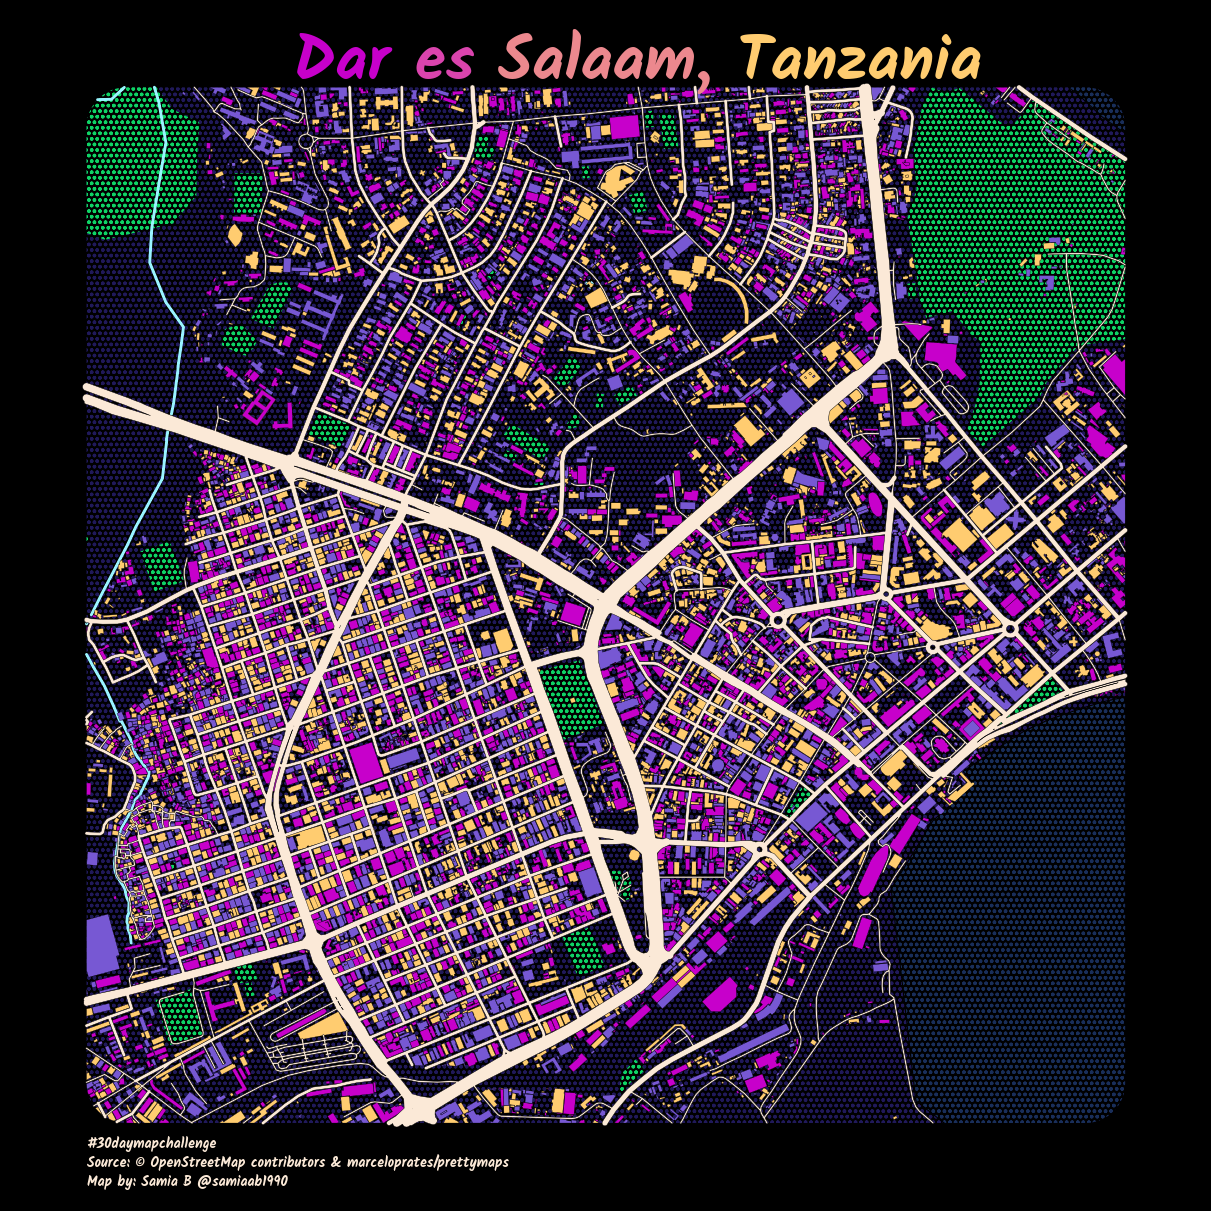

In [107]:
# Initialize Plot
fig, axis = plt.subplots(figsize = (12, 12), constrained_layout = True)
fig.patch.set_facecolor('#000000')

# dilate - round edges (but not circle)
dilate = 100

# Initialize color schemes for layers 
# commented out colors not used as pal 
street_color = ['#FBE9D7']
buildings = ['#C700CB','#7758D3','#FFCC70']
#green_space = ['#59B200']
#grass = ['#0ED365']
#water = ['#99F4FF']
#sand = ['#DFD5B0']

# Plot
osmnx_layers = plot(
            # Place Name
             query = 'Dar es Salaam',
            # Dist argument 
             radius=1200,
             # Axis (matplotlib argument)
             ax = axis,
            #OSM layers 
             layers = {
                'perimeter':{'circle': False, 'dilate': dilate},
                'streets':{
                    'width':
                    {
                        'motorway': 10,
                        'trunk':  10,
                        'primary': 8,
                        'secondary':7,
                        'tertiary': 6,
                        'cycleway': 6,
                        'residential': 4,
                        'service': 3,
                        'unclassified':2,
                        'pedestrian':2,
                        'service':2,
                        'footway':2,
                        'path':2},
                 'circle': False, 
                 'dilate': dilate
                                  },
                 'building': {
                     'tags': {
                         'building': True}, 
                          'union': False, 
                          'circle': False, 
                          'dilate': dilate},
                 'park':{'tags':{
                                 'leisure':'park'}, 
                                 'circle':False,
                                 'dilate':dilate},
                 'green_space':{'tags':{
                                 'boundary':'national_park',
                                 'leisure': ['nature_reserve', 'garden','pitch','playground','golf_course'],
                                 'landuse': ['recreation_ground', 'village_green','meadow'],
                                 'landuse': 'village_green',
                                 'natural': 'grassland'},
                                 'circle': False,
                                 'dilate': dilate},
                 'grass': { 'tags':{
                     'landuse': ['grass','village_green']
                     
                 },
                           'circle':False,
                           'dilate': dilate
                     
                 },
                 'water': {'tags':{'natural':['water','bay'], 'place': ['ocean', 'sea']}, 'circle': False, 'dilate': dilate},
                 'river_stream':{'tags':{'waterway':['stream','river']}, 'circle': False, 'dilate':dilate},
                 'sand':{'tags':{'natural':'sand'}, 'circle': False,'dilate':dilate},
                 'coast':{'tags':{'natural':'coastline'}, 'circle':False, 'dilate':dilate},
                 
                 # thank you https://github.com/marceloprates/prettymaps/pull/47
                 'coastline': {'file_location':'..\\GitHub\\30 day map challenge 2022\\openstreetmap\\water-polygons-split-4326\\water-polygons-split-4326\\water_polygons.shp',
                        'buffer': 100000,
                        'circle': False,
                        'dilate':dilate
                            }
                
                
                      },
            #Color customization  
            ## fc - fill color
            ## ec - edge color
            ## hatch - pattern
            ## zordering: higher(topmost) - lower(bottom-most)
    
            drawing_kwargs = 
            {
            'background':{'fc':'#000000', 'zorder': -1},
            'perimeter':{'fc': '#000000', 'ec':'#20195A', 'lw': 0, 'fill': False, 'hatch':'ooo...', 'zorder':0},
            'streets': {'palette': street_color, 'zorder': 1, 'lw': .3, 'zorder':4, 'ec':'#000000'},
            'building':{'palette': buildings, 'lw': .2, 'zorder': 3, 'ec':'#000000'},
            'park':{'fc':'#000000','hatch':'ooo...', 'zorder':2, 'ec':'#0ED365','lw':0},
            'green_space':{'fc': '#000000','hatch':'ooo...', 'zorder':2, 'ec':'#0ED365', 'lw':0},
            'grass':{'fc':'#000000','hatch':'ooo...', 'zorder':2, 'ec':'#0ED365','lw':0},
            'water':{'fc':'#000000', 'zorder':2, 'hatch':'ooo...', 'ec':'#99F4FF', 'lw':0},
            'sand':{'fc': '#000000', 'ec':'#3C3C3C', 'lw': 0, 'fill': False, 'hatch':'ooo...', 'zorder':0},
            #'coast':{'lw':2, 'zorder':4, 'ec':'#20195A', 'zorder':4},
            'coastline': {'fc': '#000000', 'hatch_c': '#192E5A', 'hatch': 'ooo...', 'lw': 0, 'zorder': 3},
            'river_stream':{'palette':water,'lw':1.5, 'zorder':2, 'fill':False, 'ec':'#99F4FF'}
            },
        
        # will source with caption
        osm_credit = False

)

# Set bounds
xmin, ymin, xmax, ymax = osmnx_layers['perimeter'].bounds
dx, dy = xmax-xmin, ymax-ymin
axis.set_xlim(xmin-.07*dx, xmax+.07*dx)
axis.set_ylim(ymin-.07*dy, ymax+.07*dy)

# text 
rainbow_text(xmin+.2*dx, ymax+.008*dx, title.split(), pal, ax=axis, fontproperties = fm.FontProperties(fname = '..\\GitHub\\30 day map challenge 2022\\fonts\\Kalam-Bold.ttf', size = 45))
axis.text(xmin, ymin-.06*dy,s = '#30daymapchallenge\nSource: © OpenStreetMap contributors & marceloprates/prettymaps\nMap by: Samia B @samiaab1990', color = '#FBE9D7', fontproperties = fm.FontProperties(fname = '..\\GitHub\\30 day map challenge 2022\\fonts\\Kalam-Bold.ttf', size = 10))

# save
plt.savefig('Dar es Salaam_prettymap_fixed_captions.png',dpi=300)